<a href="https://colab.research.google.com/github/llai7/MATH227C/blob/main/Math227C_P07_LuluLai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Math 227C Problem Set 7

How does the size of the mitochondria in a cell depend on the size of the cell itself?

In [31]:
library(ggplot2)

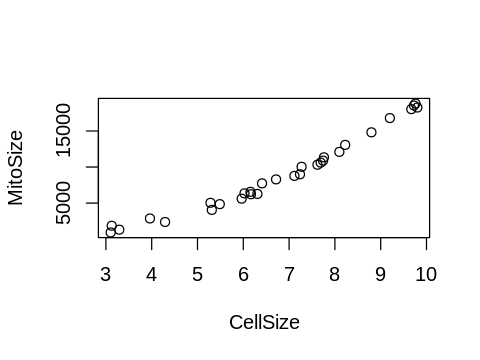

In [7]:
# plot settings
options(repr.plot.width=4, repr.plot.height=3)

# Simulate power-law data

N <- 30
alpha <- 2.3
Y0 <- 100
sigma <- 500

CellSize <- runif(N,3,10) # independent variable
eps <- rnorm(N,0,sigma) # residuals

MitoSize <- Y0*CellSize^alpha + eps

plot(CellSize,MitoSize)

## Part 1 

__(a)__ Use nonlinear least squares (`nls`) to estimate the parameter $\alpha$ from the simulated data. Use (`b=1,a=5`) as starting guesses in the `nls` function.

b          a 
116.780097   2.235165

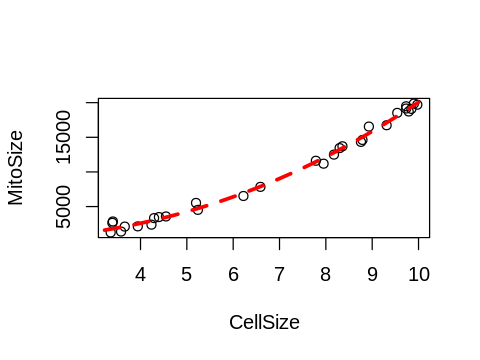

In [3]:
modelMitoSize <- nls(MitoSize~b*CellSize^a, start=list(b=1,a=5))

coef(modelMitoSize) # show coefficients

plot(CellSize,MitoSize)

# plot model prediction
cellSizeAxis <- seq(0,10,length=100)
b <- coef(modelMitoSize)[1]
a <- coef(modelMitoSize)[2]
mitoSizePrediction <- b*cellSizeAxis^a

lines(cellSizeAxis,mitoSizePrediction,col="red",lty=2,lwd=3)

In [4]:
eps <- abs(a-alpha)
print(eps)

         a 
0.06483544 


Define the __error__ as $e=|\hat{\alpha}-\alpha|$ where $\hat{\alpha}$ is the estimate and $\alpha$ is the true value (which is known because this is simulated data). 

__(b)__ Write a function to execute the simulation and nls fitting, taking in the true model parameters $\alpha, y_0, \sigma$ and the sample size $N$. Plot the error in $\alpha$ estimation, $e$, as a function of the magnitude of the noise, $\sigma$, for a range of $\sigma=(100,2000)$. 

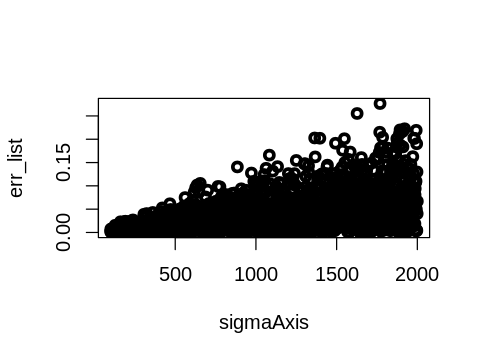

In [27]:
func <- function(alpha, y0, sigma, N){
  CellSize <- runif(N,3,10) # independent variable
  eps <- rnorm(N,0,sigma) # residuals

  MitoSize <- y0*CellSize^alpha + eps
  
  modelMitoSize <- nls(MitoSize~b*CellSize^a, start=list(b=1,a=5))  
  a <- coef(modelMitoSize)[2]

  eps <- abs(a-alpha)
  return(eps)
}

err_list <- list()
for (sigma in 100:2000){
  err_value <- func(3.1,50,sigma,30)
  err_list <- append(err_list, err_value)
}

sigmaAxis <- 100:2000

plot(sigmaAxis,err_list,lty=2,lwd=3)

## Part 2

__(a)__ Transform the simulated data to $lY = \mbox{log}(y)$ and $lX = \mbox{log}(x)$. Use linear regression model fit (lm) to estimate the parameter $\alpha$ from the simulated data.

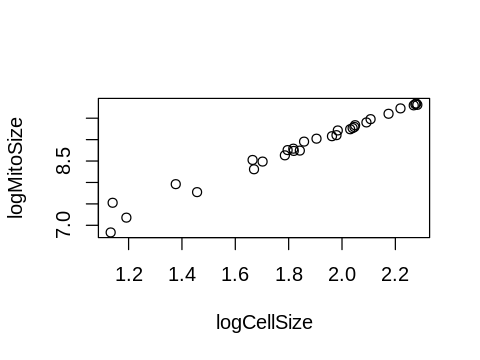

In [8]:
logMitoSize <- log(MitoSize)
logCellSize <- log(CellSize)

plot(logCellSize,logMitoSize)

(Intercept) 
   4.504519

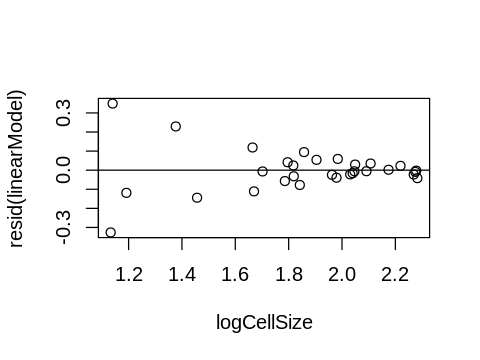

In [9]:
linearModel = lm(logMitoSize~logCellSize)
a.linear <- coef(linearModel)[1]
a.linear

# plot residuals
plot(logCellSize,resid(linearModel))
abline(0,0)

__(b)__ Write a function that executes the simulation, log-transforms the data, and performs linear regression fitting. Plot the error in $\alpha$ estimation, $e$, as a function of the magnitude of the noise, $\sigma$, for a range of $\sigma=(100,2000)$. 

Note you may need additional code to handle negative measurements.

__(c)__ Overplot the error in $\alpha$ from nls and the error from lm (as functions of $\sigma$). 

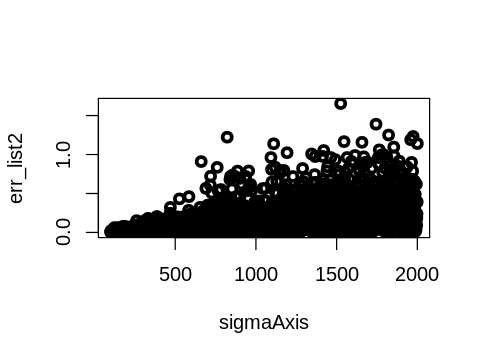

In [37]:
func2 <- function(alpha, y0, sigma, N){
  CellSize <- runif(N,3,10) # independent variable
  eps <- rnorm(N,0,sigma) # residuals

  MitoSize <- y0*CellSize^alpha + eps
  MitoSize[MitoSize<0] <- mean(MitoSize[MitoSize>0])
  CellSize[MitoSize<0] <- mean(CellSize[MitoSize>0])

  logMitoSize <- log(MitoSize)
  logCellSize <- log(CellSize)

  modelMitoSize2 <- lm(logMitoSize~logCellSize)
  a <- coef(modelMitoSize2)[2]

  eps <- abs(a-alpha)
  return(eps)
}

err_list2 <- list()
for (sigma in 100:2000){
  err_value <- func2(3.1,50,sigma,30)
  err_list2 <- append(err_list2, err_value)
}

sigmaAxis <- 100:2000

plot(sigmaAxis,err_list2,lty=2,lwd=3)


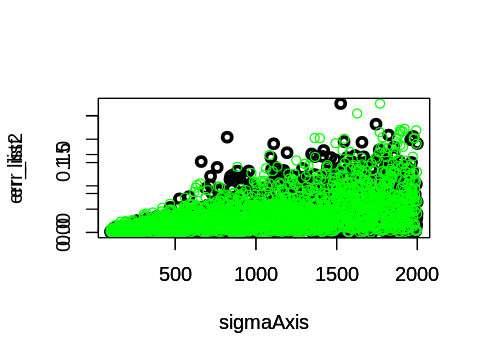

In [38]:
#overlap with a from nls
plot(sigmaAxis,err_list2,lty=2,lwd=3)
par(new=TRUE)
plot(sigmaAxis,err_list, col="green" )

## Part 3

In the above simulations, the independent variable $X$ was chosen from a uniform distribution.

__(a)__ Find a distribution of $X$ data that makes a very big difference between error from nls and error from lm.

__(b)__ Find a distribution of $X$ data that makes a very small difference between the error from nls and error from lm.

In [93]:
func <- function(alpha, y0, sigma, N){
  CellSize <- rpois(N,10) # independent variable
  eps <- rnorm(N,0,sigma) # residuals

  MitoSize <- y0*CellSize^alpha + eps
  
  modelMitoSize <- nls(MitoSize~b*CellSize^a, start=list(b=1,a=5))  
  a <- coef(modelMitoSize)[2]

  eps <- abs(a-alpha)
  return(eps)
}

err_list <- list()
for (sigma in 100:500){
  err_value <- func(3.1,50,sigma,30)
  err_list <- append(err_list, err_value)
}

func2 <- function(alpha, y0, sigma, N){
  CellSize <- rpois(N,10) # independent variable
  eps <- rnorm(N,0,sigma) # residuals

  MitoSize <- y0*CellSize^alpha + eps
  MitoSize[MitoSize<0] <- mean(MitoSize[MitoSize>0])
  CellSize[MitoSize<0] <- mean(CellSize[MitoSize>0])

  logMitoSize <- log(MitoSize)
  logCellSize <- log(CellSize)

  modelMitoSize2 <- lm(logMitoSize~logCellSize)
  a <- coef(modelMitoSize2)[2]

  eps <- abs(a-alpha)
  return(eps)
}

err_list2 <- list()
for (sigma in 100:500){
  err_value <- func2(3.1,50,sigma,30)
  err_list2 <- append(err_list2, err_value)
}

sigmaAxis <- 100:500



**Running from uniform distribution with min=1 present a big difference between nls and lm**

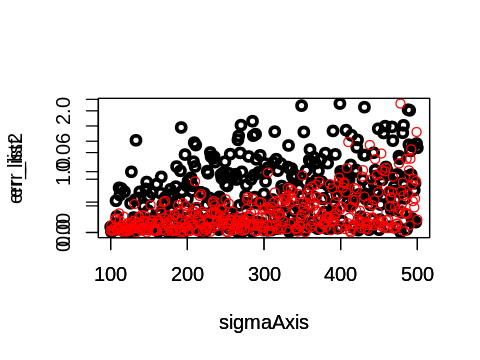

In [87]:
plot(sigmaAxis,err_list2,lty=2,lwd=3)
par(new=TRUE)
plot(sigmaAxis,err_list, col="red" )

**Running from poisson distribution with lamba=4 plots more consistent between nls and lm**


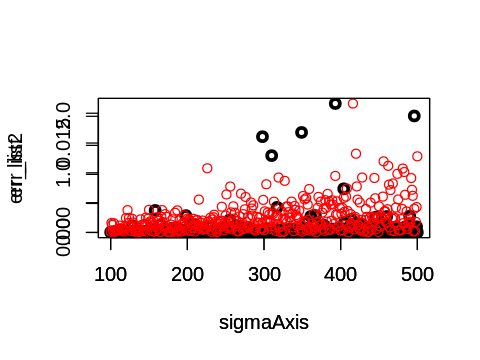

In [94]:
plot(sigmaAxis,err_list2,lty=2,lwd=3)
par(new=TRUE)
plot(sigmaAxis,err_list, col="red" )